In [47]:
import numpy as np
import pandas as pd

In [48]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

C:\Users\rahul\AppData\Local\Temp\ipykernel_18084\3397335393.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [49]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [50]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [51]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [52]:
books.shape, ratings.shape, users.shape

((271360, 8), (1149780, 3), (278858, 3))

In [53]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [54]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [55]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [56]:
books.duplicated().sum()

np.int64(0)

In [57]:
users.duplicated().sum()

np.int64(0)

In [58]:
ratings.duplicated().sum()

np.int64(0)

**EDA**

In [59]:
books['Year-Of-Publication'].unique()[:20]

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986], dtype=object)

In [60]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

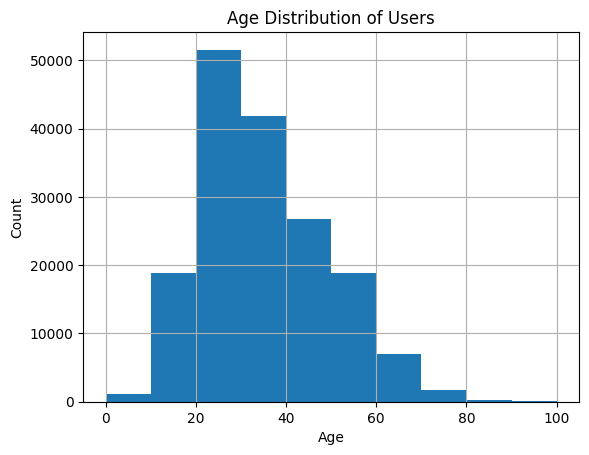

In [61]:
#age distribution plot
users['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Book Rating Distribution')

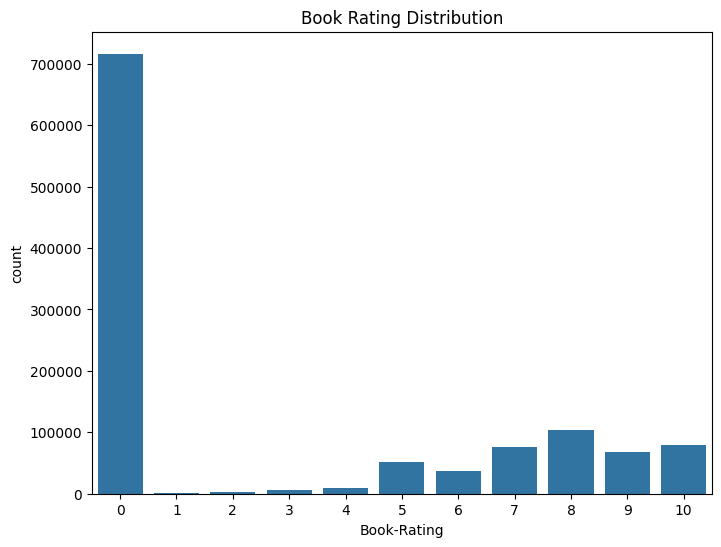

In [62]:
import seaborn as sns
#Book Rating Distribution plot
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings)
plt.title('Book Rating Distribution')

**Popularity Based Recommendation System**

In [63]:
#min. of 250 votes

In [64]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [65]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [66]:
avg_rating_df=ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [67]:
popularity_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popularity_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [68]:
#only keep whose num_rating>250
popularity_df=popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [69]:
popularity_df=popularity_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [70]:
popularity_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [71]:
popularity_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


**Collaborative Filtering Based Recommender**

user and books grid
consider users with rating over 200 books and books with over 50 ratings

In [72]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [73]:
ratings_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [74]:
X=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
ratings_given_users=X[X].index

In [75]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(ratings_given_users)]

In [76]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [77]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [78]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [79]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [80]:
pt.shape

(706, 810)

In [81]:
pt.fillna(0,inplace=True)

In [82]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


now can imagine every book as a point in a 810 dimensional coordinate system
each book is a vector
now we have to find similar vectors through calculating eucledian distance

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

calculating eucledian distance of 710 books with 710 books

In [84]:
similarity_scores=cosine_similarity(pt)

In [85]:
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [86]:
similarity_scores.shape

(706, 706)

In [87]:
def recommend(book_name):
    #fetch index
    index=np.where(pt.index==book_name)[0][0]
    # distances=similarity_scores[index]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data=[]
    for i in similar_items:
        # print(pt.index[i[0]])
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data    

In [88]:
recommend('The Fourth Hand')

[['A Prayer for Owen Meany',
  'John Irving',
  'http://images.amazon.com/images/P/0345361792.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Good Omens',
  'Neil Gaiman',
  'http://images.amazon.com/images/P/0441003257.01.MZZZZZZZ.jpg'],
 ['The Burden of Proof',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446360589.01.MZZZZZZZ.jpg'],
 ["I Know This Much Is True (Oprah's Book Club)",
  'Wally Lamb',
  'http://images.amazon.com/images/P/0060391626.01.MZZZZZZZ.jpg']]

In [89]:
pt.index[47]

'Animal Farm'

In [90]:
np.where(pt.index=='1984')[0][0]

np.int64(0)

In [91]:
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)[1:6]

[(47, np.float64(0.2702651417103732)),
 (545, np.float64(0.2639619371123497)),
 (82, np.float64(0.23669374347400993)),
 (634, np.float64(0.23299389358170394)),
 (551, np.float64(0.2262639743141286))]

In [92]:
import pickle
pickle.dump(popularity_df,open('popular.pkl','wb'))

In [93]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))